In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the directory path where the CSV files are located
directory_path = r'C:\Users\deepakgayu\Downloads\sing_house'


house = pd.concat([pd.read_csv(file) for file in glob.glob(os.path.join(directory_path, '*.csv'))], ignore_index=True)


In [3]:
house.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [4]:
house.shape

(934382, 11)

In [5]:
house.storey_range.unique()


array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934382 entries, 0 to 934381
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                934382 non-null  object 
 1   town                 934382 non-null  object 
 2   flat_type            934382 non-null  object 
 3   block                934382 non-null  object 
 4   street_name          934382 non-null  object 
 5   storey_range         934382 non-null  object 
 6   floor_area_sqm       934382 non-null  float64
 7   flat_model           934382 non-null  object 
 8   lease_commence_date  934382 non-null  int64  
 9   resale_price         934382 non-null  float64
 10  remaining_lease      225332 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.4+ MB


In [7]:
#split the year in the month column
house[['year','month']]=house['month'].str.split('-',expand=True)
house['block'] = house['block'].str.split(r'(\D)', expand=True)[0].astype('int64')

#split the storeyrange
house[['storey_start','storey_end']]=house['storey_range'].str.split('TO',expand=True)

#changing the following columns into numeric
house['month']=pd.to_numeric(house['month'])
house['year']=pd.to_numeric(house['year'])
house['floor_area_sqm']=pd.to_numeric(house['floor_area_sqm'])
house['resale_price']=pd.to_numeric(house['resale_price'])
house['storey_start']=pd.to_numeric(house['storey_start'])
house['storey_end']=pd.to_numeric(house['storey_end'])

house.drop(columns='storey_range',inplace=True)

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934382 entries, 0 to 934381
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                934382 non-null  int64  
 1   town                 934382 non-null  object 
 2   flat_type            934382 non-null  object 
 3   block                934382 non-null  int64  
 4   street_name          934382 non-null  object 
 5   floor_area_sqm       934382 non-null  float64
 6   flat_model           934382 non-null  object 
 7   lease_commence_date  934382 non-null  int64  
 8   resale_price         934382 non-null  float64
 9   remaining_lease      225332 non-null  object 
 10  year                 934382 non-null  int64  
 11  storey_start         934382 non-null  int64  
 12  storey_end           934382 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 92.7+ MB


In [8]:
house.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
storey_start                0
storey_end                  0
dtype: int64

In [9]:

# Ensure 'year' and 'lease_commence_date' are numeric to avoid type issues
house['year'] = pd.to_numeric(house['year'], errors='coerce')
house['lease_commence_date'] = pd.to_numeric(house['lease_commence_date'], errors='coerce')

# Handle the null values using assign and a lambda function
house = house.assign(
    remaining_lease=lambda x: x['remaining_lease'].fillna(99 - (x['year'] - x['lease_commence_date']))
)

# Convert 'remaining_lease' to numeric to avoid type errors
house['remaining_lease'] = pd.to_numeric(house['remaining_lease'], errors='coerce')

# Filter out rows where 'remaining_lease' is greater than 99 using loc
house = house.loc[house['remaining_lease'] <= 99]



In [10]:

house.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
dtype: int64

In [11]:
house.nunique()

month                    12
town                     27
flat_type                 8
block                   973
street_name             542
floor_area_sqm          209
flat_model               33
lease_commence_date      48
resale_price           7898
remaining_lease          52
year                     27
storey_start             22
storey_end               23
dtype: int64

In [12]:
#handle the str error
house['flat_model']=house['flat_model'].str.upper()

house['flat_type']=house['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

In [13]:

# Adding a new feature to improve results
house['price_per_sqm']=house['resale_price']/house['floor_area_sqm']

house['years_holding']=house['year']-house['lease_commence_date']

current_year =datetime.datetime.now().year

house['current_remaining_lease']=house['remaining_lease']-(current_year-house['year'])

house['age_of_property']=current_year-house['lease_commence_date']

In [14]:
house.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0,47
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0,47
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0,47
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0,47
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0,48


In [15]:

house.describe().T

,count,mean,std,min,25%,50%,75%,max
month,746152.0,6.570325,3.410361,1.000000,4.000000,7.000000,10.000000,1.200000e+01
block,746152.0,344.535431,255.573583,1.000000,124.000000,291.000000,531.000000,9.900000e+02
floor_area_sqm,746152.0,95.334135,26.230299,28.000000,71.000000,93.000000,114.000000,3.070000e+02
lease_commence_date,746152.0,1986.398046,8.683406,1966.000000,1980.000000,1985.000000,1993.000000,2.013000e+03
resale_price,746152.0,277843.066554,139433.591836,5000.000000,172000.000000,260000.000000,365000.000000,1.150000e+06
remaining_lease,746152.0,82.666616,9.121939,48.000000,77.000000,84.000000,90.000000,9.900000e+01
year,746152.0,2002.707249,6.742047,1990.000000,1998.000000,2002.000000,2008.000000,2.016000e+03
storey_start,746152.0,6.420816,4.470941,1.000000,4.000000,7.000000,10.000000,4.900000e+01
storey_end,746152.0,8.439145,4.471997,3.000000,6.000000,9.000000,12.000000,5.100000e+01
price_per_sqm,746152.0,2867.608831,1171.457499,161.290323,2176.470588,2648.648649,3477.272727,1.064516e+04


In [16]:
#catagorial and numerical 

cat_column = [col for col in house.columns if house[col].dtype == "object"]
num_column = [col for col in house.columns if house[col].dtype != "object"]

In [17]:
for col in cat_column:
    print(col,'-',len(house[col].unique()))

town - 27
flat_type - 7
street_name - 542
flat_model - 20


In [18]:
for num in num_column:
    print(num,'-',len(house[num].unique()))

month - 12
block - 973
floor_area_sqm - 209
lease_commence_date - 48
resale_price - 7898
remaining_lease - 52
year - 27
storey_start - 22
storey_end - 23
price_per_sqm - 58485
years_holding - 51
current_remaining_lease - 49
age_of_property - 48


In [19]:
house.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2015, 2016, 2013, 2014], dtype=int64)

In [20]:
house.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [21]:
house['flat_model'].value_counts()

flat_model
MODEL A                   202082
IMPROVED                  197266
NEW GENERATION            166509
SIMPLIFIED                 50592
STANDARD                   37594
APARTMENT                  28735
PREMIUM APARTMENT          26346
MAISONETTE                 24532
MODEL A2                    8064
MODEL A-MAISONETTE          1753
ADJOINED FLAT                933
TERRACE                      596
MULTI GENERATION             465
DBSS                         277
TYPE S1                      138
IMPROVED-MAISONETTE          100
PREMIUM MAISONETTE            72
TYPE S2                       55
2-ROOM                        38
PREMIUM APARTMENT LOFT         5
Name: count, dtype: int64

In [22]:
house['flat_type'].value_counts()

flat_type
4 ROOM              276018
3 ROOM              253156
5 ROOM              150437
EXECUTIVE            56217
2 ROOM                8623
1 ROOM                1236
MULTI-GENERATION       465
Name: count, dtype: int64

In [23]:
house['town'].value_counts()

town
TAMPINES           67859
YISHUN             57668
BEDOK              57043
JURONG WEST        54722
WOODLANDS          52710
ANG MO KIO         44618
HOUGANG            41628
BUKIT BATOK        37491
CHOA CHU KANG      30052
PASIR RIS          27835
BUKIT MERAH        27408
TOA PAYOH          25879
CLEMENTI           23970
QUEENSTOWN         23779
GEYLANG            23751
KALLANG/WHAMPOA    21754
JURONG EAST        21071
BUKIT PANJANG      21043
SERANGOON          19524
BISHAN             17986
SENGKANG           17495
SEMBAWANG           8912
PUNGGOL             7217
MARINE PARADE       6923
CENTRAL AREA        5687
BUKIT TIMAH         2063
LIM CHU KANG          64
Name: count, dtype: int64

In [24]:

house.describe().T

,count,mean,std,min,25%,50%,75%,max
month,746152.0,6.570325,3.410361,1.000000,4.000000,7.000000,10.000000,1.200000e+01
block,746152.0,344.535431,255.573583,1.000000,124.000000,291.000000,531.000000,9.900000e+02
floor_area_sqm,746152.0,95.334135,26.230299,28.000000,71.000000,93.000000,114.000000,3.070000e+02
lease_commence_date,746152.0,1986.398046,8.683406,1966.000000,1980.000000,1985.000000,1993.000000,2.013000e+03
resale_price,746152.0,277843.066554,139433.591836,5000.000000,172000.000000,260000.000000,365000.000000,1.150000e+06
remaining_lease,746152.0,82.666616,9.121939,48.000000,77.000000,84.000000,90.000000,9.900000e+01
year,746152.0,2002.707249,6.742047,1990.000000,1998.000000,2002.000000,2008.000000,2.016000e+03
storey_start,746152.0,6.420816,4.470941,1.000000,4.000000,7.000000,10.000000,4.900000e+01
storey_end,746152.0,8.439145,4.471997,3.000000,6.000000,9.000000,12.000000,5.100000e+01
price_per_sqm,746152.0,2867.608831,1171.457499,161.290323,2176.470588,2648.648649,3477.272727,1.064516e+04


skewness and outliers

In [25]:

#function for plot
def compare_chart(house,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,4,figsize=(20,5))

        sns.histplot(data=house, x=col1, kde=True, bins=20,ax= axs[0])
        axs[0].set_title(f"{col1} after log transformation")

        sns.boxplot(data=house, y=col1, ax=axs[1], palette=["orange"])
        axs[1].set_title(f"{col1} after outliers handle")

        sns.histplot(data=house, x=col2, kde=True, bins=20,ax= axs[2], color='green')
        axs[2].set_title(f"{col2} before log transformation")

        sns.boxplot(data=house, y=col2, ax=axs[3], color='#BD1313')
        axs[3].set_title(f"{col2} before outliers handle")

        plt.tight_layout()
        plt.show()

In [26]:
# Skewness handle with log transformation

house['floor_area_sqm_log']=np.log(house['floor_area_sqm'])
house['resale_price_log']=np.log(house['resale_price'])
house['remaining_lease_log']=np.log1p(house['remaining_lease'])
house['price_per_sqm_log']=np.log(house['price_per_sqm'])

In [27]:
# Outliers handle with IQR and cliping method

def outlier(house, column):
    iqr = house[column].quantile(0.75) - house[column].quantile(0.25)
    upper_threshold = house[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = house[column].quantile(0.25) - (1.5*iqr)
    house[column] = house[column].clip(lower_threshold, upper_threshold)

In [28]:
outlier(house,'floor_area_sqm_log')
outlier(house,'resale_price_log')
outlier(house,'remaining_lease_log')
outlier(house,'price_per_sqm_log')
     

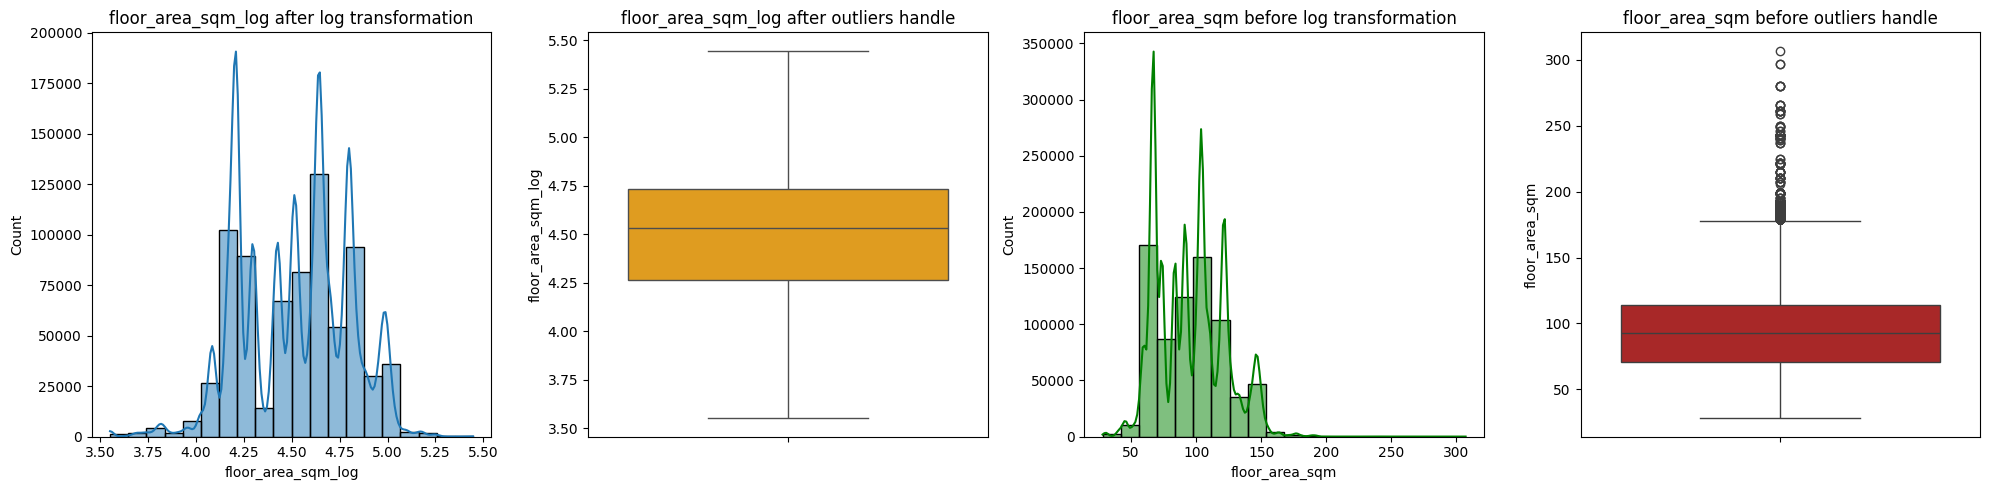

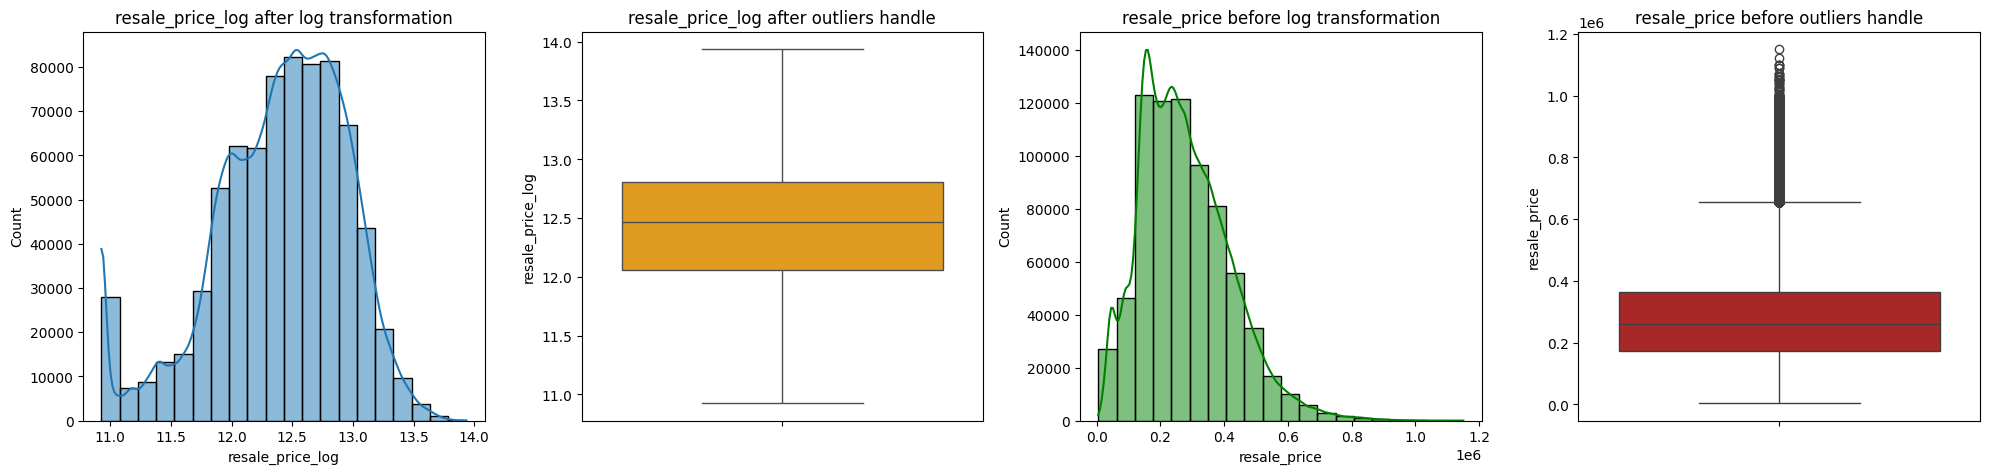

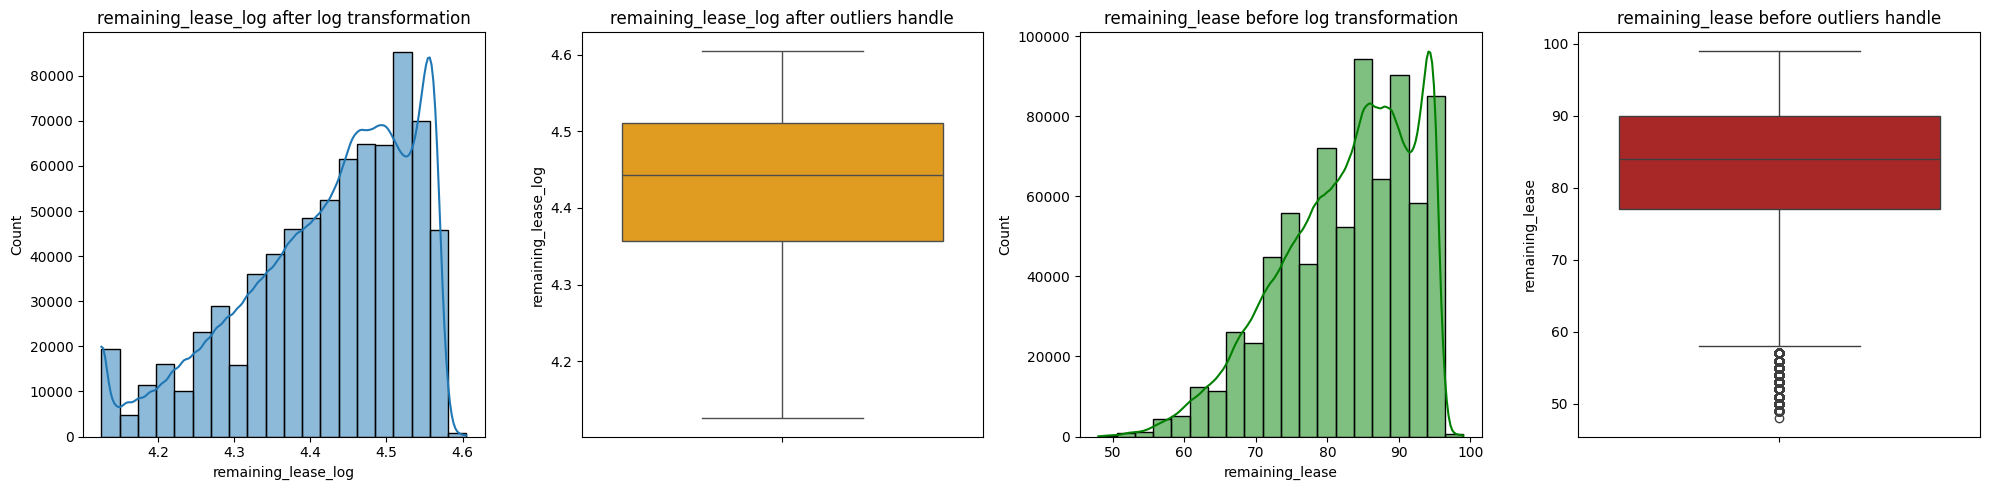

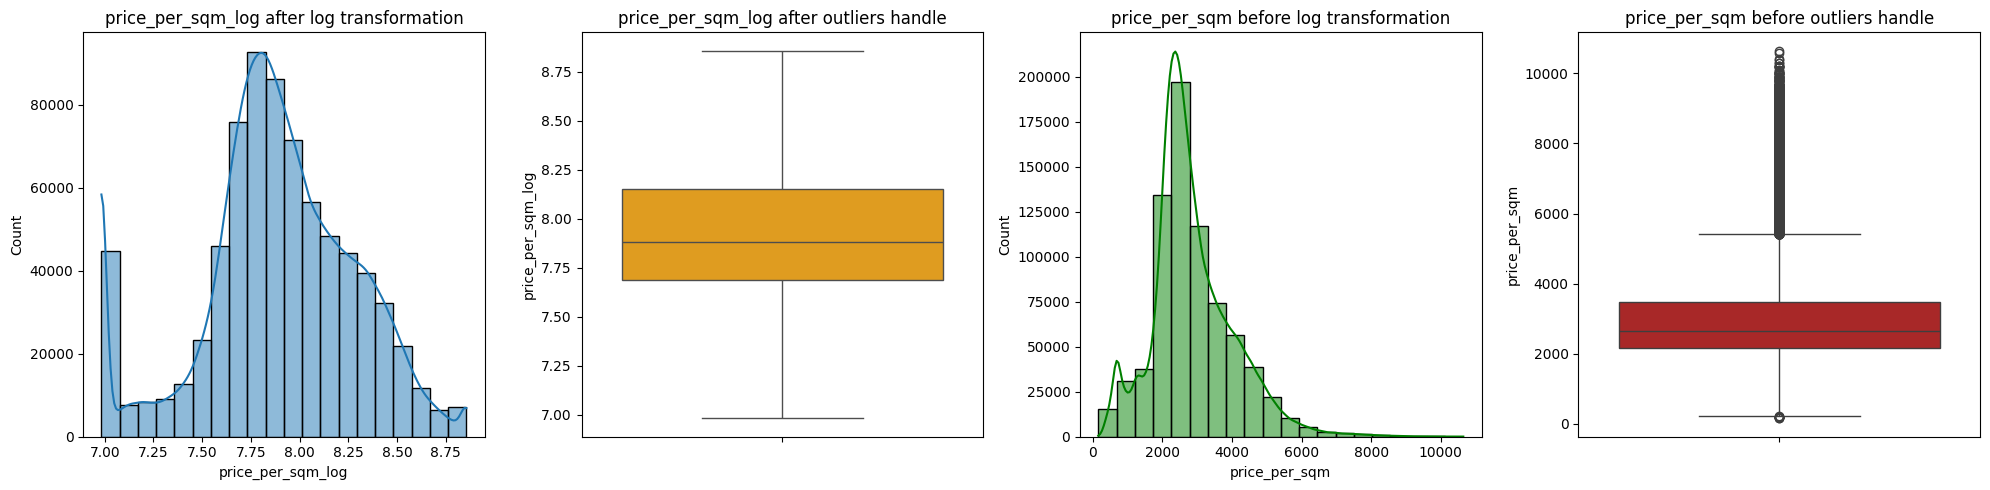

In [29]:

col1=['floor_area_sqm_log','resale_price_log','remaining_lease_log','price_per_sqm_log']
col2=['floor_area_sqm','resale_price','remaining_lease','price_per_sqm']

compare_chart(house,col1,col2)

In [30]:

#drop the columns

house.drop(columns=['street_name', 'floor_area_sqm','resale_price','remaining_lease','price_per_sqm'],inplace=True)

Text(0.5, 1.0, 'Correlation of all features with target feature')

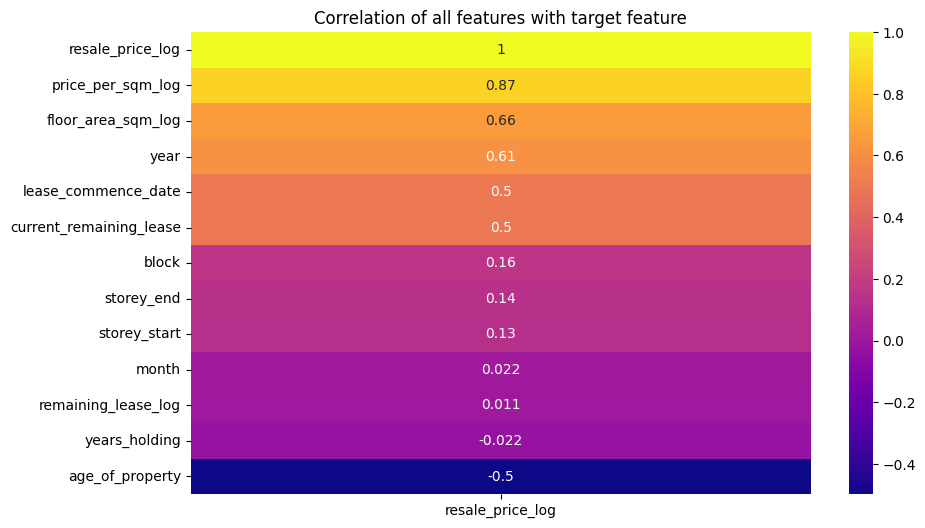

In [31]:

#correlation with heatmap

corr_plt=house[['month','block','floor_area_sqm_log','lease_commence_date','resale_price_log','remaining_lease_log','year','storey_start',
            'storey_end','price_per_sqm_log','years_holding','current_remaining_lease','age_of_property']].corr()

target_corr=corr_plt['resale_price_log'].sort_values(ascending=False)



plt.figure(figsize=(10,6))
sns.heatmap(target_corr.to_frame(),annot=True, cmap='plasma')
plt.title('Correlation of all features with target feature')

Modeling

In [32]:
house_data=house.copy()
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746152 entries, 0 to 934381
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    746152 non-null  int64  
 1   town                     746152 non-null  object 
 2   flat_type                746152 non-null  object 
 3   block                    746152 non-null  int64  
 4   flat_model               746152 non-null  object 
 5   lease_commence_date      746152 non-null  int64  
 6   year                     746152 non-null  int64  
 7   storey_start             746152 non-null  int64  
 8   storey_end               746152 non-null  int64  
 9   years_holding            746152 non-null  int64  
 10  current_remaining_lease  746152 non-null  float64
 11  age_of_property          746152 non-null  int64  
 12  floor_area_sqm_log       746152 non-null  float64
 13  resale_price_log         746152 non-null  float64
 14  remaining

In [33]:

# function for encoding the catogorical features

from sklearn.preprocessing import LabelEncoder

def encoding(house,columns):
    le=LabelEncoder()

    house[columns]=le.fit_transform(house[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)

In [34]:
house_data['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [35]:

encoding(house_data,'town')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [36]:

house_data['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [37]:

house_data['block'].unique()

array([309, 216, 211, 202, 235, 232, 308, 220, 219, 247, 320, 252, 223,
       230, 329, 313, 117, 110, 343, 345, 346, 121, 129, 130, 128, 127,
       126, 403, 404, 405, 417, 418, 419, 441, 442, 443, 444, 450, 435,
       433, 434, 424, 425, 466, 471, 474, 570, 586, 455, 465, 463, 564,
       560, 558, 559, 538, 534, 601, 603, 604, 608, 611, 505, 503, 610,
       607, 524, 513, 643, 542, 548, 550, 639, 637, 330, 333, 156, 152,
       178, 180, 209, 231, 254, 103, 105, 344, 324, 120, 124, 414, 438,
       427, 428, 473, 573, 585, 456, 544, 640, 638, 646, 150, 179, 336,
       335, 401, 439, 430, 460, 459, 716, 545, 620, 622, 259, 101,  18,
        28,  29,  30,  75,  76, 501, 502, 504,   2,  20,  21,  59,  58,
        55,  22, 104, 107,  69,  33,  46, 116, 115, 125, 138,  87, 100,
       412, 402, 416, 136, 529, 510, 525, 218, 213, 532, 533, 536, 537,
        44, 540, 702, 615, 712,  50,  54, 606, 616,  15,  34,  36,  35,
        41,  42,  53,  51,   8, 718, 724, 166,  71,  82,  78,  7

In [38]:

encoding(house_data,'flat_type')

1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI-GENERATION : 6


In [39]:
house_data['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'TYPE S1', 'TYPE S2', 'DBSS', 'PREMIUM APARTMENT LOFT'],
      dtype=object)

In [40]:
encoding(house_data,'flat_model')

2-ROOM : 0
ADJOINED FLAT : 1
APARTMENT : 2
DBSS : 3
IMPROVED : 4
IMPROVED-MAISONETTE : 5
MAISONETTE : 6
MODEL A : 7
MODEL A-MAISONETTE : 8
MODEL A2 : 9
MULTI GENERATION : 10
NEW GENERATION : 11
PREMIUM APARTMENT : 12
PREMIUM APARTMENT LOFT : 13
PREMIUM MAISONETTE : 14
SIMPLIFIED : 15
STANDARD : 16
TERRACE : 17
TYPE S1 : 18
TYPE S2 : 19


In [41]:
house_data[['town','flat_type','flat_model']]=house_data[['town','flat_type','flat_model']].astype('int64')
house_data.head()


,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,0,0,309,4,1977,1990,10,12,13,52.0,47,3.552402,10.926645,4.465908,6.982644
1,1,0,0,309,4,1977,1990,4,6,13,52.0,47,3.552402,10.926645,4.465908,6.982644
2,1,0,0,309,4,1977,1990,10,12,13,52.0,47,3.552402,10.926645,4.465908,6.982644
3,1,0,0,309,4,1977,1990,7,9,13,52.0,47,3.552402,10.926645,4.465908,6.982644
4,1,0,2,216,11,1976,1990,4,6,14,51.0,48,4.290459,10.926645,4.454347,6.982644


In [42]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn import metrics
import pickle
     

In [43]:
#split the data into x and y

x=house_data.drop(['resale_price_log'],axis=1)
y=house_data['resale_price_log']

x.shape,y.shape
     

((746152, 15), (746152,))

In [44]:

# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)

                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}

        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]

        return best_algorithm, results

In [45]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor ]

best_algorithm, results = best_ML_algorithm(x,y, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                  0.029396            0.003040                 0.055137  0.990190
DecisionTreeRegressor             0.003945            0.000744                 0.027273  0.997600
RandomForestRegressor             0.003127            0.000417                 0.020423  0.998654
ExtraTreesRegressor               0.003290            0.000473                 0.021746  0.998474
**Best Algorithm:** RandomForestRegressor


In [46]:
# with best algorithm matching the parameter from above result and train the model


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=150,max_features=None,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.003082745500568136
Mean Squared Error: 0.00040391821880777313
Root Mean Squared Error: 0.02009771675608384
R-squared: 0.9986966665391706


In [47]:

#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

price_per_sqm_log          0.771114
floor_area_sqm_log         0.223491
flat_type                  0.003853
block                      0.000350
town                       0.000290
year                       0.000240
month                      0.000219
storey_start               0.000074
storey_end                 0.000070
years_holding              0.000060
remaining_lease_log        0.000059
age_of_property            0.000048
flat_model                 0.000047
lease_commence_date        0.000043
current_remaining_lease    0.000041
dtype: float64

In [48]:
# store the model using pickle

with open('RandomForestRegressor','wb') as files:
    pickle.dump(model_regressor,files)


In [49]:
#load the file 

with open('RandomForestRegressor','rb') as files:
    model=pickle.load(files)